In [1]:
# Import libaries and dependencies #
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data & convert to dataframe
batting_data_load = "../Project_01/CHC_batting.csv"
batting_data = pd.read_csv(batting_data_load)
batting_data.head()

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No


In [3]:
# Import data & convert to dataframe
pitching_data_load = "../Project_01/CHC_pitching.csv"
pitching_data = pd.read_csv(pitching_data_load)
pitching_data.head()

,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
1,2,2023,SP,Jameson Taillon,31,8,10,0.444,4.84,30,...,93,4.61,1.276,9.1,1.6,2.4,8.2,3.41,Right,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
3,4,2023,SP,Kyle Hendricks,33,6,8,0.429,3.74,24,...,120,3.81,1.204,9.1,0.9,1.8,6.1,3.44,Right,No
4,5,2023,SP,Marcus Stroman,32,10,9,0.526,3.95,27,...,113,3.58,1.259,7.9,0.6,3.4,7.8,2.29,Right,No


In [4]:
# Explore data

print("General info about batting:")
print(batting_data.shape)
print(batting_data.columns)
print(batting_data.dtypes)

print("General info about pitching:")
print(pitching_data.shape)
print(pitching_data.columns)
pitching_data.dtypes

General info about batting:
(5241, 31)
Index(['Rank', 'Year', 'Position', 'Name', 'Age', 'Games', 'Plate_Appearances',
       'At_Bats', 'Runs', 'Hits', 'Doubles', 'Triples', 'Home_Runs',
       'Runs_Batted_In', 'Stolen_Bases', 'Caught_Stealing', 'Base_On_Balls',
       'Strikeouts', 'Batting_Average', 'On_Base_Percentage',
       'Slugging_Percentage', 'On_Base_Plus_Slugging_Percentage',
       'On_Base_Plus_Slugging_Percentage_Plus', 'Total_Bases',
       'Double_Plays_Grounded_Into', 'Times_Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Intentional_Bases_on_Balls', 'Dominant_Hand',
       'Switch_Hitter'],
      dtype='object')
Rank                                       int64
Year                                       int64
Position                                  object
Name                                      object
Age                                        int64
Games                                      int64
Plate_Appearances                          int64
At_B

Rank                               int64
Year                               int64
Position                          object
Name                              object
Age                                int64
Wins                               int64
Losses                             int64
Winning_Percentage               float64
Earned_Run_Average               float64
Games_Played                       int64
Games_Started                      int64
Games_Finished                     int64
Complete_Games                     int64
Shutouts                           int64
Saves                              int64
Innings_Pitched                  float64
Hits_Allowed                       int64
Runs_Allowed                       int64
Earned_Runs                        int64
Home_Runs_Allowed                  int64
Walks_Allowed                      int64
Intentional_Walks_Allowed          int64
Strikeouts                         int64
Hit_By_Pitch                       int64
Balks           

In [5]:
# # Convert object to string
# batting_data['Position'] = batting_data['Position'].astype("string")
# print(batting_data['Position'].dtype)

In [6]:
# # Convert object to string
# pitching_data['Dominant_Hand'] = pitching_data['Dominant_Hand'].astype("string")
# print(pitching_data['Dominant_Hand'].dtype)

In [7]:
# Check for missing values
print(batting_data.isna().sum())             
print(pitching_data.isna().sum())

Rank                                      0
Year                                      0
Position                                 78
Name                                      0
Age                                       0
Games                                     0
Plate_Appearances                         0
At_Bats                                   0
Runs                                      0
Hits                                      0
Doubles                                   0
Triples                                   0
Home_Runs                                 0
Runs_Batted_In                            0
Stolen_Bases                              0
Caught_Stealing                           0
Base_On_Balls                             0
Strikeouts                                0
Batting_Average                           0
On_Base_Percentage                        0
Slugging_Percentage                       0
On_Base_Plus_Slugging_Percentage          0
On_Base_Plus_Slugging_Percentage

In [8]:
# There are nans in the Position column. List the batting positions.
batting_data["Position"].unique()

array(['C', '1B', '2B', 'SS', '3B', 'LF', 'CF', 'RF', 'DH', 'CI', 'OF',
       'P', 'UT', 'IF', 'MI', nan], dtype=object)

In [9]:
# Drop the rows with missing Position.
batting_position_clean = batting_data.dropna()
batting_position_clean

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,7,1876,OF,John Glenn,26,66,288,276,55,84,...,0.685,120,97,0,0,0,0,0,Right,No
5237,8,1876,OF,Paul Hines,21,64,306,305,62,101,...,0.773,146,134,0,0,0,0,0,Right,No
5238,9,1876,OF,Oscar Bielaski,29,32,141,139,24,29,...,0.450,44,32,0,0,0,0,0,Right,No
5239,10,1876,OF,Fred Andrus,25,8,36,36,6,11,...,0.694,121,14,0,0,0,0,0,Right,No


In [10]:
# Confirm the rows with missing Position were dropped.
print(len(batting_data))
print(len(batting_position_clean))
print(len(batting_data) - len(batting_position_clean))
print(batting_position_clean.isna().sum())
batting_position_clean["Position"].unique() 

5241
5163
78
Rank                                     0
Year                                     0
Position                                 0
Name                                     0
Age                                      0
Games                                    0
Plate_Appearances                        0
At_Bats                                  0
Runs                                     0
Hits                                     0
Doubles                                  0
Triples                                  0
Home_Runs                                0
Runs_Batted_In                           0
Stolen_Bases                             0
Caught_Stealing                          0
Base_On_Balls                            0
Strikeouts                               0
Batting_Average                          0
On_Base_Percentage                       0
Slugging_Percentage                      0
On_Base_Plus_Slugging_Percentage         0
On_Base_Plus_Slugging_Percentage_Plus    

array(['C', '1B', '2B', 'SS', '3B', 'LF', 'CF', 'RF', 'DH', 'CI', 'OF',
       'P', 'UT', 'IF', 'MI'], dtype=object)

In [11]:
# duplicates: Since the players are listed by rank, each player should only appear once per year. 
# Confirm that there are no duplicates.
duplicate_players = batting_data.loc[batting_data.duplicated(['Name','Year']), "Name"].unique()
print(duplicate_players)

[]


In [12]:
# Confirm there are no outliers to skew our data results?

In [13]:
# Initial data exploration:
# sum stats

# visualizations for potential relationships (-> regression)

The r-value is 0.0056428420095168364.


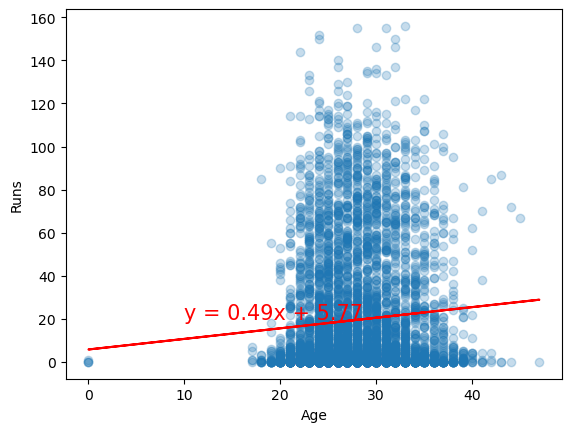

The r-value is 0.008256072644018128.


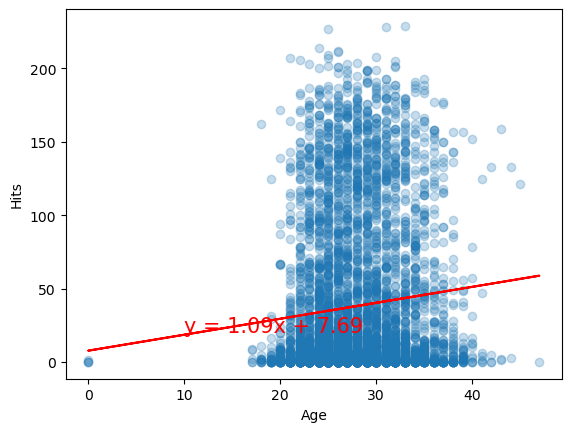

The r-value is 0.009900761218802703.


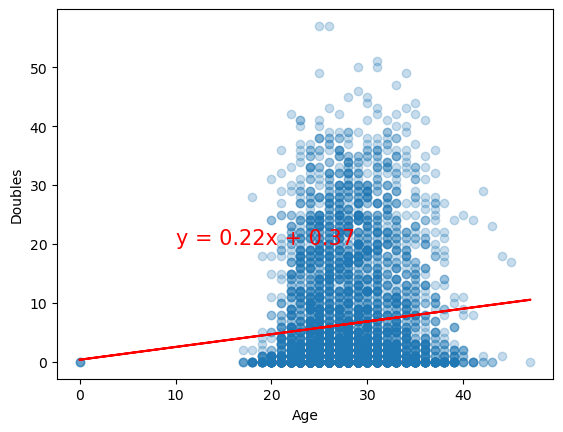

The r-value is 3.507418844650481e-05.


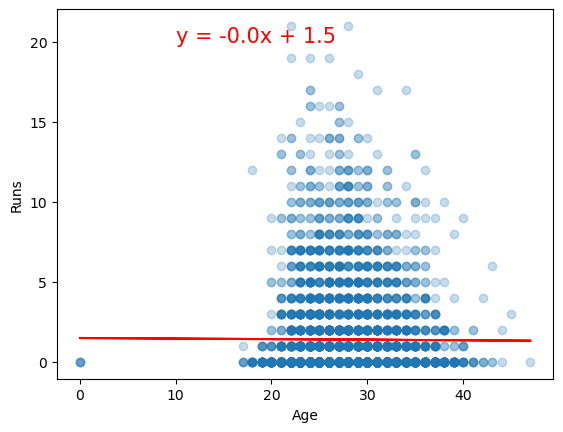

The r-value is 0.010362006106735587.


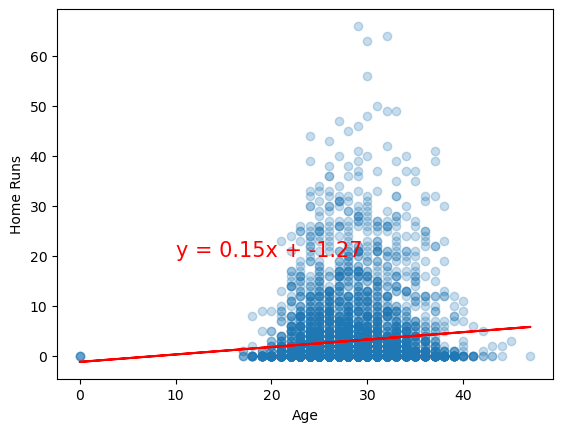

Age does not predict performance.


In [14]:
# Visualizations for Age & Performance
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Runs"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Runs"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Runs")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Hits"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Hits"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Hits")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Doubles"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Doubles"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Doubles")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Triples"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Triples"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Runs")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Home_Runs"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Home_Runs"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Home Runs")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

print("Age does not predict performance.")

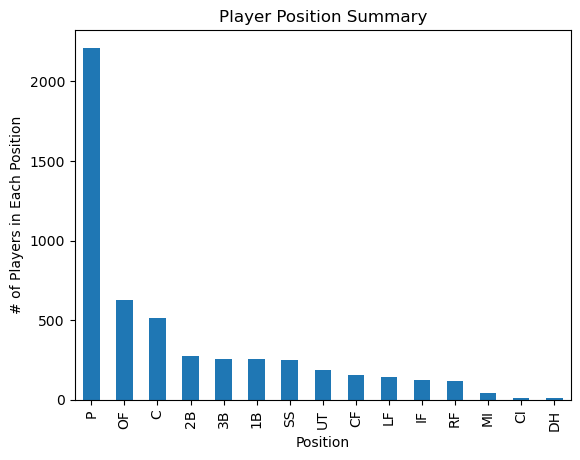

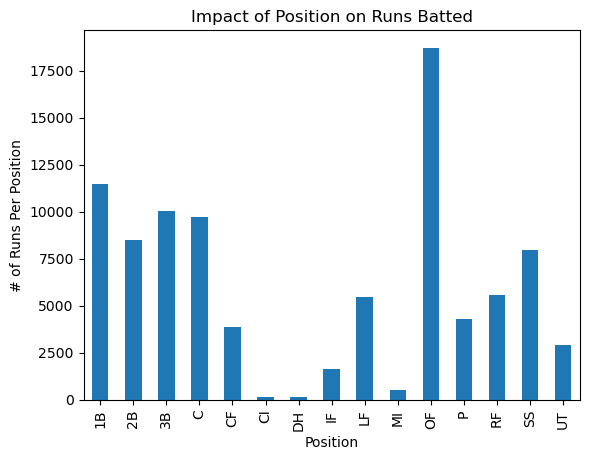

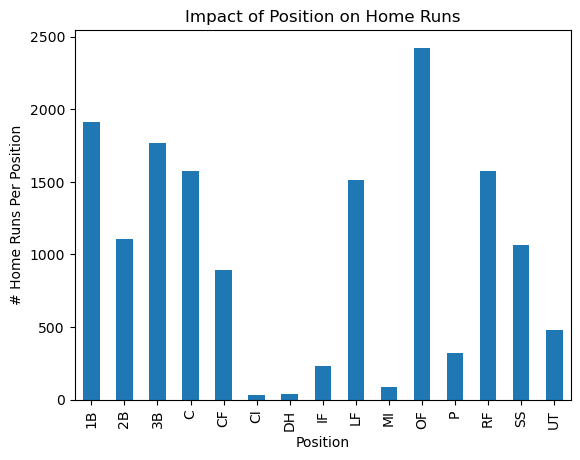

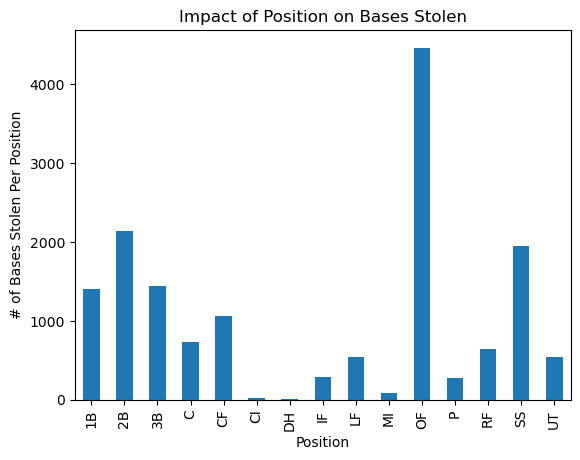

In [62]:
# Player Position and Batter Performance

position_total = batting_data["Position"].value_counts()
position_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# of Players in Each Position',
                    title="Player Position Summary")
plt.show()

position_runs_total = batting_data.groupby(["Position"])["Runs_Batted_In"].sum()
position_runs_total.head()
position_runs_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# of Runs Per Position',
                    title="Impact of Position on Runs Batted")
plt.show()

position_homeruns_total = batting_data.groupby(["Position"])["Home_Runs"].sum()
position_homeruns_total.head()
position_homeruns_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# Home Runs Per Position',
                    title="Impact of Position on Home Runs")
plt.show()


position_basesstolen_total = batting_data.groupby(["Position"])["Stolen_Bases"].sum()
position_basesstolen_total.head()
position_basesstolen_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# of Bases Stolen Per Position',
                    title="Impact of Position on Bases Stolen")
plt.show()

In [63]:
position_count = position_total.sort_index()
position_count



Position
1B     254
2B     271
3B     257
C      515
CF     153
CI      10
DH       9
IF     125
LF     143
MI      40
OF     626
P     2213
RF     116
SS     246
UT     185
Name: count, dtype: int64

In [64]:
runs_batted_avg_byposition = position_runs_total / position_count
runs_batted_avg_byposition


Position
1B    45.133858
2B    31.302583
3B    39.070039
C     18.854369
CF    25.111111
CI    15.100000
DH    14.222222
IF    13.112000
LF    38.181818
MI    12.800000
OF    29.904153
P      1.938093
RF    48.172414
SS    32.418699
UT    15.778378
dtype: float64

In [65]:
position_homeruns_total

Position
1B    1910
2B    1106
3B    1768
C     1573
CF     891
CI      30
DH      37
IF     232
LF    1514
MI      85
OF    2424
P      324
RF    1574
SS    1066
UT     480
Name: Home_Runs, dtype: int64

In [66]:
# The number of total homeruns for that position / the number of players in that position 
#       = the average number of homeruns per player in that position


#  the number of players in that position  / The number of total homeruns for that position 
#  = a proportion

homeruns_avg_by_position = position_homeruns_total / position_count
homeruns_avg_by_position

Position
1B     7.519685
2B     4.081181
3B     6.879377
C      3.054369
CF     5.823529
CI     3.000000
DH     4.111111
IF     1.856000
LF    10.587413
MI     2.125000
OF     3.872204
P      0.146408
RF    13.568966
SS     4.333333
UT     2.594595
dtype: float64

In [67]:
bases_stolen_avg_by_position = position_basesstolen_total / position_count
bases_stolen_avg_by_position

Position
1B    5.511811
2B    7.896679
3B    5.599222
C     1.407767
CF    6.960784
CI    1.900000
DH    0.666667
IF    2.248000
LF    3.783217
MI    2.175000
OF    7.137380
P     0.125621
RF    5.577586
SS    7.926829
UT    2.935135
dtype: float64

In [ ]:
# Is it more useful to use avg, or flip the fraction and use proprortion?

In [16]:
# Does a pitcher's overall performance impact game losses and wins?

In [17]:
# Does a player's dominant hand have an impact on the player's performance?


# All right-handed players:
pitching_data_right = pitching_data.loc[pitching_data["Dominant_Hand"] ==  "Right"]
pitching_data_right.head()

# All left-handed players:
pitching_data_left = pitching_data.loc[pitching_data["Dominant_Hand"] ==  "Left"]
pitching_data_left.head()



,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
12,13,2023,NaN,Jordan Wicks,23,4,1,0.800,4.41,7,...,102,4.70,1.269,8.6,1.3,2.9,6.2,2.18,Left,No
17,18,2023,NaN,Brandon Hughes,27,0,3,0.000,7.24,17,...,63,4.65,1.610,9.2,1.3,5.3,11.2,2.13,Left,No
18,19,2023,NaN,Anthony Kay,28,0,0,0.000,6.35,13,...,73,5.37,1.765,9.5,0.8,6.4,6.4,1.00,Left,No


In [18]:
# Look at Strikeouts_Per_Nine_Innings

strikeouts_right_mean = pitching_data_right["Strikeouts_Per_Nine_Innings"].mean()
strikeouts_right_median = pitching_data_right["Strikeouts_Per_Nine_Innings"].median()
strikeouts_right_std = pitching_data_right["Strikeouts_Per_Nine_Innings"].std()

In [19]:
strikeouts_left_mean = pitching_data_left["Strikeouts_Per_Nine_Innings"].mean()
strikeouts_left_median = pitching_data_left["Strikeouts_Per_Nine_Innings"].median()
strikeouts_left_std = pitching_data_left["Strikeouts_Per_Nine_Innings"].std()

In [20]:
strikeouts_byhand_summary_r = {
                    'Average': strikeouts_right_mean,            
                    'Median': strikeouts_right_median,      
                    'Std. Dev.': strikeouts_right_std      
                    }

strikeouts_byhand_summary_rt = pd.DataFrame(strikeouts_byhand_summary_r, index=['Right-handed'])
strikeouts_byhand_summary_rt

,Average,Median,Std. Dev.
Right-handed,5.232828,4.7,2.987241


In [21]:
strikeouts_byhand_summary_l = {
                    'Average': strikeouts_left_mean,            
                    'Median': strikeouts_left_median,      
                    'Std. Dev.': strikeouts_left_std      
                    }

strikeouts_byhand_summary_lt = pd.DataFrame(strikeouts_byhand_summary_l, index=['Left-handed'])
strikeouts_byhand_summary_lt

,Average,Median,Std. Dev.
Left-handed,5.738079,5.3,3.324458


In [22]:
# stikeouts_byhand_summary = pd.concat([strikeouts_byhand_summary_rt,strikeouts_byhand_summary_lt], ignore_index=False)


In [23]:
# strikeouts_byhand_summary

<Axes: ylabel='Dominant Hand'>

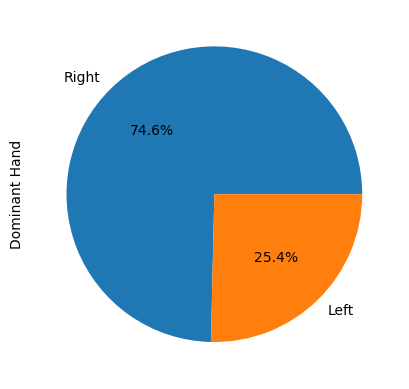

In [24]:
# Pie chart of right vs left-handed
dominant_hand_comparison = pitching_data["Dominant_Hand"].value_counts()
dominant_hand_comparison.plot(
                        kind='pie',
                        ylabel='Dominant Hand',
                        autopct="%1.1f%%")